In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
Rute_1 = "Now it came to pass in the days when the judges ruled, that there was a famine in the land. And a certain man of Bethlehemjudah went to sojourn in the country of Moab, he, and his wife, and his two sons.And the name of the man was Elimelech, and the name of his wife Naomi, and the name of his two sons Mahlon and Chilion, Ephrathites of Bethlehemjudah. And they came into the country of Moab, and continued there.And Elimelech Naomi' husband died; and she was left, and her two sons.And they took them wives of the women of Moab; the name of the one was Orpah, and the name of the other Ruth: and they dwelled there about ten years.And Mahlon and Chilion died also both of them; and the woman was left of her two sons and her husband.Then she arose with her daughters in law, that she might return from the country of Moab: for she had heard in the country of Moab how that the LORD had visited his people in giving them bread.Why she went forth out of the place where she was, and her two daughters in law with her; and they went on the way to return to the land of Judah.And Naomi said to her two daughters in law, Go, return each to her mother' house: the LORD deal kindly with you, as you have dealt with the dead, and with me.The LORD grant you that you may find rest, each of you in the house of her husband. Then she kissed them; and they lifted up their voice, and wept.And they said to her, Surely we will return with you to your people.And Naomi said, Turn again, my daughters: why will you go with me? are there yet any more sons in my womb, that they may be your husbands?Turn again, my daughters, go your way; for I am too old to have an husband. If I should say, I have hope, if I should have an husband also to night, and should also bear sons;Would you tarry for them till they were grown? would you stay for them from having husbands? no, my daughters; for it grieves me much for your sakes that the hand of the LORD is gone out against me.And they lifted up their voice, and wept again: and Orpah kissed her mother in law; but Ruth joined to her.And she said, Behold, your sister in law is gone back to her people, and to her gods: return you after your sister in law.And Ruth said, Entreat me not to leave you, or to return from following after you: for where you go, I will go; and where you lodge, I will lodge: your people shall be my people, and your God my God:Where you die, will I die, and there will I be buried: the LORD do so to me, and more also, if ought but death part you and me.When she saw that she was steadfastly minded to go with her, then she left speaking to her.So they two went until they came to Bethlehem. And it came to pass, when they were come to Bethlehem, that all the city was moved about them, and they said, Is this Naomi?And she said to them, Call me not Naomi, call me Mara: for the Almighty has dealt very bitterly with me.I went out full and the LORD has brought me home again empty: why then call you me Naomi, seeing the LORD has testified against me, and the Almighty has afflicted me?So Naomi returned, and Ruth the Moabitess, her daughter in law, with her, which returned out of the country of Moab: and they came to Bethlehem in the beginning of barley harvest.".lower()

In [6]:
Rute_2 = "And Naomi had a kinsman of her husband', a mighty man of wealth, of the family of Elimelech; and his name was Boaz.And Ruth the Moabitess said to Naomi, Let me now go to the field, and glean ears of corn after him in whose sight I shall find grace. And she said to her, Go, my daughter.And she went, and came, and gleaned in the field after the reapers: and her hap was to light on a part of the field belonging to Boaz, who was of the kindred of Elimelech.And, behold, Boaz came from Bethlehem, and said to the reapers, The LORD be with you. And they answered him, The LORD bless you.Then said Boaz to his servant that was set over the reapers, Whose damsel is this?And the servant that was set over the reapers answered and said, It is the Moabitish damsel that came back with Naomi out of the country of Moab:And she said, I pray you, let me glean and gather after the reapers among the sheaves: so she came, and has continued even from the morning until now, that she tarried a little in the house.Then said Boaz to Ruth, Hear you not, my daughter? Go not to glean in another field, neither go from hence, but abide here fast by my maidens:Let your eyes be on the field that they do reap, and go you after them: have I not charged the young men that they shall not touch you? and when you are thirsty, go to the vessels, and drink of that which the young men have drawn.Then she fell on her face, and bowed herself to the ground, and said to him, Why have I found grace in your eyes, that you should take knowledge of me, seeing I am a stranger?And Boaz answered and said to her, It has fully been showed me, all that you have done to your mother in law since the death of your husband: and how you have left your father and your mother, and the land of your nativity, and are come to a people which you knew not heretofore.The LORD recompense your work, and a full reward be given you of the LORD God of Israel, under whose wings you are come to trust.Then she said, Let me find favor in your sight, my lord; for that you have comforted me, and for that you have spoken friendly to your handmaid, though I be not like to one of your handmaidens.And Boaz said to her, At mealtime come you here, and eat of the bread, and dip your morsel in the vinegar. And she sat beside the reapers: and he reached her parched corn, and she did eat, and was sufficed, and left.And when she was risen up to glean, Boaz commanded his young men, saying, Let her glean even among the sheaves, and reproach her not:And let fall also some of the handfuls of purpose for her, and leave them, that she may glean them, and rebuke her not.So she gleaned in the field until even, and beat out that she had gleaned: and it was about an ephah of barley.And she took it up, and went into the city: and her mother in law saw what she had gleaned: and she brought forth, and gave to her that she had reserved after she was sufficed.And her mother in law said to her, Where have you gleaned to day? and where worked you? blessed be he that did take knowledge of you. And she showed her mother in law with whom she had worked, and said, The man' name with whom I worked to day is Boaz.And Naomi said to her daughter in law, Blessed be he of the LORD, who has not left off his kindness to the living and to the dead. And Naomi said to her, The man is near of kin to us, one of our next kinsmen.And Ruth the Moabitess said, He said to me also, You shall keep fast by my young men, until they have ended all my harvest.And Naomi said to Ruth her daughter in law, It is good, my daughter, that you go out with his maidens, that they meet you not in any other field.So she kept fast by the maidens of Boaz to glean to the end of barley harvest and of wheat harvest; and dwelled with her mother in law.".lower()

In [8]:
Rute_3 = "Then Naomi her mother in law said to her, My daughter, shall I not seek rest for you, that it may be well with you?And now is not Boaz of our kindred, with whose maidens you were? Behold, he winnows barley to night in the threshing floor.Wash yourself therefore, and anoint you, and put your raiment on you, and get you down to the floor: but make not yourself known to the man, until he shall have done eating and drinking.And it shall be, when he lies down, that you shall mark the place where he shall lie, and you shall go in, and uncover his feet, and lay you down; and he will tell you what you shall do.And she said to her, All that you say to me I will do.And she went down to the floor, and did according to all that her mother in law bade her.And when Boaz had eaten and drunk, and his heart was merry, he went to lie down at the end of the heap of corn: and she came softly, and uncovered his feet, and laid her down.And it came to pass at midnight, that the man was afraid, and turned himself: and, behold, a woman lay at his feet.And he said, Who are you? And she answered, I am Ruth your handmaid: spread therefore your skirt over your handmaid; for you are a near kinsman.And he said, Blessed be you of the LORD, my daughter: for you have showed more kindness in the latter end than at the beginning, inasmuch as you followed not young men, whether poor or rich.And now, my daughter, fear not; I will do to you all that you require: for all the city of my people does know that you are a virtuous woman.And now it is true that I am your near kinsman: however, there is a kinsman nearer than I.Tarry this night, and it shall be in the morning, that if he will perform to you the part of a kinsman, well; let him do the kinsman' part: but if he will not do the part of a kinsman to you, then will I do the part of a kinsman to you, as the LORD lives: lie down until the morning.And she lay at his feet until the morning: and she rose up before one could know another. And he said, Let it not be known that a woman came into the floor.Also he said, Bring the veil that you have on you, and hold it. And when she held it, he measured six measures of barley, and laid it on her: and she went into the city.And when she came to her mother in law, she said, Who are you, my daughter? And she told her all that the man had done to her.And she said, These six measures of barley gave he me; for he said to me, Go not empty to your mother in law.Then said she, Sit still, my daughter, until you know how the matter will fall: for the man will not be in rest, until he have finished the thing this day.".lower()

In [9]:
Rute_4 = "Then went Boaz up to the gate, and sat him down there: and, behold, the kinsman of whom Boaz spoke came by; to whom he said, Ho, such a one! turn aside, sit down here. And he turned aside, and sat down.And he took ten men of the elders of the city, and said, Sit you down here. And they sat down.And he said to the kinsman, Naomi, that is come again out of the country of Moab, sells a parcel of land, which was our brother Elimelech':And I thought to advertise you, saying, Buy it before the inhabitants, and before the elders of my people. If you will redeem it, redeem it: but if you will not redeem it, then tell me, that I may know: for there is none to redeem it beside you; and I am after you. And he said, I will redeem it.Then said Boaz, What day you buy the field of the hand of Naomi, you must buy it also of Ruth the Moabitess, the wife of the dead, to raise up the name of the dead on his inheritance.And the kinsman said, I cannot redeem it for myself, lest I mar my own inheritance: redeem you my right to yourself; for I cannot redeem it.Now this was the manner in former time in Israel concerning redeeming and concerning changing, for to confirm all things; a man plucked off his shoe, and gave it to his neighbor: and this was a testimony in Israel.Therefore the kinsman said to Boaz, Buy it for you. So he drew off his shoe.And Boaz said to the elders, and to all the people, You are witnesses this day, that I have bought all that was Elimelech', and all that was Chilion' and Mahlon', of the hand of Naomi.Moreover Ruth the Moabitess, the wife of Mahlon, have I purchased to be my wife, to raise up the name of the dead on his inheritance, that the name of the dead be not cut off from among his brothers, and from the gate of his place: you are witnesses this day.And all the people that were in the gate, and the elders, said, We are witnesses. The LORD make the woman that is come into your house like Rachel and like Leah, which two did build the house of Israel: and do you worthily in Ephratah, and be famous in Bethlehem:And let your house be like the house of Pharez, whom Tamar bore to Judah, of the seed which the LORD shall give you of this young woman.So Boaz took Ruth, and she was his wife: and when he went in to her, the LORD gave her conception, and she bore a son.And the women said to Naomi, Blessed be the LORD, which has not left you this day without a kinsman, that his name may be famous in Israel.And he shall be to you a restorer of your life, and a nourisher of your old age: for your daughter in law, which loves you, which is better to you than seven sons, has born him.And Naomi took the child, and laid it in her bosom, and became nurse to it.And the women her neighbors gave it a name, saying, There is a son born to Naomi; and they called his name Obed: he is the father of Jesse, the father of David.Now these are the generations of Pharez: Pharez begat Hezron,And Hezron begat Ram, and Ram begat Amminadab,And Amminadab begat Nahshon, and Nahshon begat Salmon,And Salmon begat Boaz, and Boaz begat Obed,And Obed begat Jesse, and Jesse begat David.".lower()

In [28]:
tokens = nltk.word_tokenize(Rute_4)

In [29]:
stop_words = set(stopwords.words('english'))

In [30]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [31]:
print(filtered_sentence1)

['went', 'boaz', 'gate', ',', 'sat', ':', ',', 'behold', ',', 'kinsman', 'boaz', 'spoke', 'came', ';', 'said', ',', 'ho', ',', 'one', '!', 'turn', 'aside', ',', 'sit', '.', 'turned', 'aside', ',', 'sat', 'down.and', 'took', 'ten', 'men', 'elders', 'city', ',', 'said', ',', 'sit', '.', 'sat', 'down.and', 'said', 'kinsman', ',', 'naomi', ',', 'come', 'country', 'moab', ',', 'sells', 'parcel', 'land', ',', 'brother', 'elimelech', "'", ':', 'thought', 'advertise', ',', 'saying', ',', 'buy', 'inhabitants', ',', 'elders', 'people', '.', 'redeem', ',', 'redeem', ':', 'redeem', ',', 'tell', ',', 'may', 'know', ':', 'none', 'redeem', 'beside', ';', '.', 'said', ',', 'redeem', 'it.then', 'said', 'boaz', ',', 'day', 'buy', 'field', 'hand', 'naomi', ',', 'must', 'buy', 'also', 'ruth', 'moabitess', ',', 'wife', 'dead', ',', 'raise', 'name', 'dead', 'inheritance.and', 'kinsman', 'said', ',', 'redeem', ',', 'lest', 'mar', 'inheritance', ':', 'redeem', 'right', ';', 'redeem', 'it.now', 'manner', 'form

In [35]:
data =np.array([["Rute_1", "'came', 'pass', 'days', 'judges', 'ruled', ',', 'famine', 'land', '.', 'certain', 'man', 'bethlehemjudah', 'went', 'sojourn', 'country', 'moab', ',', ',', 'wife', ',', 'two', 'sons.and', 'name', 'man', 'elimelech', ',', 'name', 'wife', 'naomi', ',', 'name', 'two', 'sons', 'mahlon', 'chilion', ',', 'ephrathites', 'bethlehemjudah', '.', 'came', 'country', 'moab', ',', 'continued', 'there.and', 'elimelech', 'naomi', ', 'husband', 'died', ';', 'left', ',', 'two', 'sons.and', 'took', 'wives', 'women', 'moab', ';', 'name', 'one', 'orpah', ',', 'name', 'ruth', ':', 'dwelled', 'ten', 'years.and', 'mahlon', 'chilion', 'died', 'also', ';', 'woman', 'left', 'two', 'sons', 'husband.then', 'arose', 'daughters', 'law', ',', 'might', 'return', 'country', 'moab', ':', 'heard', 'country', 'moab', 'lord', 'visited', 'people', 'giving', 'bread.why', 'went', 'forth', 'place', ',', 'two', 'daughters', 'law', ';', 'went', 'way', 'return', 'land', 'judah.and', 'naomi', 'said', 'two', 'daughters', 'law', ',', 'go', ',', 'return', 'mother', ', 'house', ':', 'lord', 'deal', 'kindly', ',', 'dealt', 'dead', ',', 'me.the', 'lord', 'grant', 'may', 'find', 'rest', ',', 'house', 'husband', '.', 'kissed', ';', 'lifted', 'voice', ',', 'wept.and', 'said', ',', 'surely', 'return', 'people.and', 'naomi', 'said', ',', 'turn', ',', 'daughters', ':', 'go', '?', 'yet', 'sons', 'womb', ',', 'may', 'husbands', '?', 'turn', ',', 'daughters', ',', 'go', 'way', ';', 'old', 'husband', '.', 'say', ',', 'hope', ',', 'husband', 'also', 'night', ',', 'also', 'bear', 'sons', ';', 'would', 'tarry', 'till', 'grown', '?', 'would', 'stay', 'husbands', '?', ',', 'daughters', ';', 'grieves', 'much', 'sakes', 'hand', 'lord', 'gone', 'me.and', 'lifted', 'voice', ',', 'wept', ':', 'orpah', 'kissed', 'mother', 'law', ';', 'ruth', 'joined', 'her.and', 'said', ',', 'behold', ',', 'sister', 'law', 'gone', 'back', 'people', ',', 'gods', ':', 'return', 'sister', 'law.and', 'ruth', 'said', ',', 'entreat', 'leave', ',', 'return', 'following', ':', 'go', ',', 'go', ';', 'lodge', ',', 'lodge', ':', 'people', 'shall', 'people', ',', 'god', 'god', ':', 'die', ',', 'die', ',', 'buried', ':', 'lord', ',', 'also', ',', 'ought', 'death', 'part', 'me.when', 'saw', 'steadfastly', 'minded', 'go', ',', 'left', 'speaking', 'her.so', 'two', 'went', 'came', 'bethlehem', '.', 'came', 'pass', ',', 'come', 'bethlehem', ',', 'city', 'moved', ',', 'said', ',', 'naomi', '?', 'said', ',', 'call', 'naomi', ',', 'call', 'mara', ':', 'almighty', 'dealt', 'bitterly', 'me.i', 'went', 'full', 'lord', 'brought', 'home', 'empty', ':', 'call', 'naomi', ',', 'seeing', 'lord', 'testified', ',', 'almighty', 'afflicted', '?', 'naomi', 'returned', ',', 'ruth', 'moabitess', ',', 'daughter', 'law', ',', ',', 'returned', 'country', 'moab', ':', 'came', 'bethlehem', 'beginning', 'barley', 'harvest', '.'"],
               ["Rute_2", "'naomi', 'kinsman', 'husband', ', ',', 'mighty', 'man', 'wealth', ',', 'family', 'elimelech', ';', 'name', 'boaz.and', 'ruth', 'moabitess', 'said', 'naomi', ',', 'let', 'go', 'field', ',', 'glean', 'ears', 'corn', 'whose', 'sight', 'shall', 'find', 'grace', '.', 'said', ',', 'go', ',', 'daughter.and', 'went', ',', 'came', ',', 'gleaned', 'field', 'reapers', ':', 'hap', 'light', 'part', 'field', 'belonging', 'boaz', ',', 'kindred', 'elimelech.and', ',', 'behold', ',', 'boaz', 'came', 'bethlehem', ',', 'said', 'reapers', ',', 'lord', '.', 'answered', ',', 'lord', 'bless', 'you.then', 'said', 'boaz', 'servant', 'set', 'reapers', ',', 'whose', 'damsel', '?', 'servant', 'set', 'reapers', 'answered', 'said', ',', 'moabitish', 'damsel', 'came', 'back', 'naomi', 'country', 'moab', ':', 'said', ',', 'pray', ',', 'let', 'glean', 'gather', 'reapers', 'among', 'sheaves', ':', 'came', ',', 'continued', 'even', 'morning', ',', 'tarried', 'little', 'house.then', 'said', 'boaz', 'ruth', ',', 'hear', ',', 'daughter', '?', 'go', 'glean', 'another', 'field', ',', 'neither', 'go', 'hence', ',', 'abide', 'fast', 'maidens', ':', 'let', 'eyes', 'field', 'reap', ',', 'go', ':', 'charged', 'young', 'men', 'shall', 'touch', '?', 'thirsty', ',', 'go', 'vessels', ',', 'drink', 'young', 'men', 'drawn.then', 'fell', 'face', ',', 'bowed', 'ground', ',', 'said', ',', 'found', 'grace', 'eyes', ',', 'take', 'knowledge', ',', 'seeing', 'stranger', '?', 'boaz', 'answered', 'said', ',', 'fully', 'showed', ',', 'done', 'mother', 'law', 'since', 'death', 'husband', ':', 'left', 'father', 'mother', ',', 'land', 'nativity', ',', 'come', 'people', 'knew', 'heretofore.the', 'lord', 'recompense', 'work', ',', 'full', 'reward', 'given', 'lord', 'god', 'israel', ',', 'whose', 'wings', 'come', 'trust.then', 'said', ',', 'let', 'find', 'favor', 'sight', ',', 'lord', ';', 'comforted', ',', 'spoken', 'friendly', 'handmaid', ',', 'though', 'like', 'one', 'handmaidens.and', 'boaz', 'said', ',', 'mealtime', 'come', ',', 'eat', 'bread', ',', 'dip', 'morsel', 'vinegar', '.', 'sat', 'beside', 'reapers', ':', 'reached', 'parched', 'corn', ',', 'eat', ',', 'sufficed', ',', 'left.and', 'risen', 'glean', ',', 'boaz', 'commanded', 'young', 'men', ',', 'saying', ',', 'let', 'glean', 'even', 'among', 'sheaves', ',', 'reproach', ':', 'let', 'fall', 'also', 'handfuls', 'purpose', ',', 'leave', ',', 'may', 'glean', ',', 'rebuke', 'not.so', 'gleaned', 'field', 'even', ',', 'beat', 'gleaned', ':', 'ephah', 'barley.and', 'took', ',', 'went', 'city', ':', 'mother', 'law', 'saw', 'gleaned', ':', 'brought', 'forth', ',', 'gave', 'reserved', 'sufficed.and', 'mother', 'law', 'said', ',', 'gleaned', 'day', '?', 'worked', '?', 'blessed', 'take', 'knowledge', '.', 'showed', 'mother', 'law', 'worked', ',', 'said', ',', 'man', ', 'name', 'worked', 'day', 'boaz.and', 'naomi', 'said', 'daughter', 'law', ',', 'blessed', 'lord', ',', 'left', 'kindness', 'living', 'dead', '.', 'naomi', 'said', ',', 'man', 'near', 'kin', 'us', ',', 'one', 'next', 'kinsmen.and', 'ruth', 'moabitess', 'said', ',', 'said', 'also', ',', 'shall', 'keep', 'fast', 'young', 'men', ',', 'ended', 'harvest.and', 'naomi', 'said', 'ruth', 'daughter', 'law', ',', 'good', ',', 'daughter', ',', 'go', 'maidens', ',', 'meet', 'field.so', 'kept', 'fast', 'maidens', 'boaz', 'glean', 'end', 'barley', 'harvest', 'wheat', 'harvest', ';', 'dwelled', 'mother', 'law', '.'"],
               ["Rute_3", "'naomi', 'mother', 'law', 'said', ',', 'daughter', ',', 'shall', 'seek', 'rest', ',', 'may', 'well', '?', 'boaz', 'kindred', ',', 'whose', 'maidens', '?', 'behold', ',', 'winnows', 'barley', 'night', 'threshing', 'floor.wash', 'therefore', ',', 'anoint', ',', 'put', 'raiment', ',', 'get', 'floor', ':', 'make', 'known', 'man', ',', 'shall', 'done', 'eating', 'drinking.and', 'shall', ',', 'lies', ',', 'shall', 'mark', 'place', 'shall', 'lie', ',', 'shall', 'go', ',', 'uncover', 'feet', ',', 'lay', ';', 'tell', 'shall', 'do.and', 'said', ',', 'say', 'do.and', 'went', 'floor', ',', 'according', 'mother', 'law', 'bade', 'her.and', 'boaz', 'eaten', 'drunk', ',', 'heart', 'merry', ',', 'went', 'lie', 'end', 'heap', 'corn', ':', 'came', 'softly', ',', 'uncovered', 'feet', ',', 'laid', 'down.and', 'came', 'pass', 'midnight', ',', 'man', 'afraid', ',', 'turned', ':', ',', 'behold', ',', 'woman', 'lay', 'feet.and', 'said', ',', '?', 'answered', ',', 'ruth', 'handmaid', ':', 'spread', 'therefore', 'skirt', 'handmaid', ';', 'near', 'kinsman.and', 'said', ',', 'blessed', 'lord', ',', 'daughter', ':', 'showed', 'kindness', 'latter', 'end', 'beginning', ',', 'inasmuch', 'followed', 'young', 'men', ',', 'whether', 'poor', 'rich.and', ',', 'daughter', ',', 'fear', ';', 'require', ':', 'city', 'people', 'know', 'virtuous', 'woman.and', 'true', 'near', 'kinsman', ':', 'however', ',', 'kinsman', 'nearer', 'i.tarry', 'night', ',', 'shall', 'morning', ',', 'perform', 'part', 'kinsman', ',', 'well', ';', 'let', 'kinsman', ', 'part', ':', 'part', 'kinsman', ',', 'part', 'kinsman', ',', 'lord', 'lives', ':', 'lie', 'morning.and', 'lay', 'feet', 'morning', ':', 'rose', 'one', 'could', 'know', 'another', '.', 'said', ',', 'let', 'known', 'woman', 'came', 'floor.also', 'said', ',', 'bring', 'veil', ',', 'hold', '.', 'held', ',', 'measured', 'six', 'measures', 'barley', ',', 'laid', ':', 'went', 'city.and', 'came', 'mother', 'law', ',', 'said', ',', ',', 'daughter', '?', 'told', 'man', 'done', 'her.and', 'said', ',', 'six', 'measures', 'barley', 'gave', ';', 'said', ',', 'go', 'empty', 'mother', 'law.then', 'said', ',', 'sit', 'still', ',', 'daughter', ',', 'know', 'matter', 'fall', ':', 'man', 'rest', ',', 'finished', 'thing', 'day', '.'"],
               ["Rute_4", "'went', 'boaz', 'gate', ',', 'sat', ':', ',', 'behold', ',', 'kinsman', 'boaz', 'spoke', 'came', ';', 'said', ',', 'ho', ',', 'one', '!', 'turn', 'aside', ',', 'sit', '.', 'turned', 'aside', ',', 'sat', 'down.and', 'took', 'ten', 'men', 'elders', 'city', ',', 'said', ',', 'sit', '.', 'sat', 'down.and', 'said', 'kinsman', ',', 'naomi', ',', 'come', 'country', 'moab', ',', 'sells', 'parcel', 'land', ',', 'brother', 'elimelech', ', ':', 'thought', 'advertise', ',', 'saying', ',', 'buy', 'inhabitants', ',', 'elders', 'people', '.', 'redeem', ',', 'redeem', ':', 'redeem', ',', 'tell', ',', 'may', 'know', ':', 'none', 'redeem', 'beside', ';', '.', 'said', ',', 'redeem', 'it.then', 'said', 'boaz', ',', 'day', 'buy', 'field', 'hand', 'naomi', ',', 'must', 'buy', 'also', 'ruth', 'moabitess', ',', 'wife', 'dead', ',', 'raise', 'name', 'dead', 'inheritance.and', 'kinsman', 'said', ',', 'redeem', ',', 'lest', 'mar', 'inheritance', ':', 'redeem', 'right', ';', 'redeem', 'it.now', 'manner', 'former', 'time', 'israel', 'concerning', 'redeeming', 'concerning', 'changing', ',', 'confirm', 'things', ';', 'man', 'plucked', 'shoe', ',', 'gave', 'neighbor', ':', 'testimony', 'israel.therefore', 'kinsman', 'said', 'boaz', ',', 'buy', '.', 'drew', 'shoe.and', 'boaz', 'said', 'elders', ',', 'people', ',', 'witnesses', 'day', ',', 'bought', 'elimelech', ', ',', 'chilion', ', 'mahlon', ', ',', 'hand', 'naomi.moreover', 'ruth', 'moabitess', ',', 'wife', 'mahlon', ',', 'purchased', 'wife', ',', 'raise', 'name', 'dead', 'inheritance', ',', 'name', 'dead', 'cut', 'among', 'brothers', ',', 'gate', 'place', ':', 'witnesses', 'day.and', 'people', 'gate', ',', 'elders', ',', 'said', ',', 'witnesses', '.', 'lord', 'make', 'woman', 'come', 'house', 'like', 'rachel', 'like', 'leah', ',', 'two', 'build', 'house', 'israel', ':', 'worthily', 'ephratah', ',', 'famous', 'bethlehem', ':', 'let', 'house', 'like', 'house', 'pharez', ',', 'tamar', 'bore', 'judah', ',', 'seed', 'lord', 'shall', 'give', 'young', 'woman.so', 'boaz', 'took', 'ruth', ',', 'wife', ':', 'went', ',', 'lord', 'gave', 'conception', ',', 'bore', 'son.and', 'women', 'said', 'naomi', ',', 'blessed', 'lord', ',', 'left', 'day', 'without', 'kinsman', ',', 'name', 'may', 'famous', 'israel.and', 'shall', 'restorer', 'life', ',', 'nourisher', 'old', 'age', ':', 'daughter', 'law', ',', 'loves', ',', 'better', 'seven', 'sons', ',', 'born', 'him.and', 'naomi', 'took', 'child', ',', 'laid', 'bosom', ',', 'became', 'nurse', 'it.and', 'women', 'neighbors', 'gave', 'name', ',', 'saying', ',', 'son', 'born', 'naomi', ';', 'called', 'name', 'obed', ':', 'father', 'jesse', ',', 'father', 'david.now', 'generations', 'pharez', ':', 'pharez', 'begat', 'hezron', ',', 'hezron', 'begat', 'ram', ',', 'ram', 'begat', 'amminadab', ',', 'amminadab', 'begat', 'nahshon', ',', 'nahshon', 'begat', 'salmon', ',', 'salmon', 'begat', 'boaz', ',', 'boaz', 'begat', 'obed', ',', 'obed', 'begat', 'jesse', ',', 'jesse', 'begat', 'david', '.'"]])

In [36]:
df = pd.DataFrame(data, index=range(100,104),columns=['Autor', 'Livro'])

In [37]:
print(df)

      Autor                                              Livro
100  Rute_1  'came', 'pass', 'days', 'judges', 'ruled', ','...
101  Rute_2  'naomi', 'kinsman', 'husband', ', ',', 'mighty...
102  Rute_3  'naomi', 'mother', 'law', 'said', ',', 'daught...
103  Rute_4  'went', 'boaz', 'gate', ',', 'sat', ':', ',', ...


In [38]:
corpus = df['Livro'].tolist()

In [39]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

4 rows


,0,1,2,3
left two sons,0.119287,0.000000,0.0,0.0
lifted voice wept,0.119287,0.000000,0.0,0.0
turn daughters go,0.119287,0.000000,0.0,0.0
two daughters law,0.119287,0.000000,0.0,0.0
two sons and,0.119287,0.000000,0.0,0.0
and naomi said,0.094047,0.086561,0.0,0.0
afflicted naomi returned,0.059644,0.000000,0.0,0.0
almighty afflicted naomi,0.059644,0.000000,0.0,0.0
almighty dealt bitterly,0.059644,0.000000,0.0,0.0
also bear sons,0.059644,0.000000,0.0,0.0


In [40]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [41]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [48]:
k = 2
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


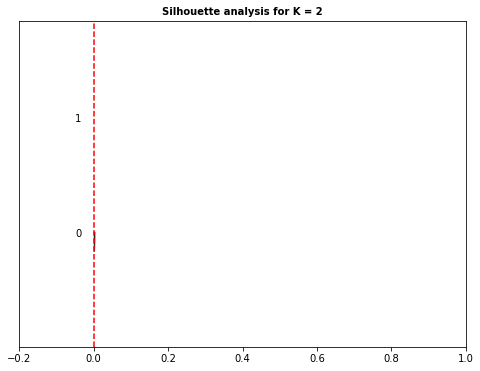

In [49]:
silhouette(kmeans_results, final_df, plot=True)

In [50]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

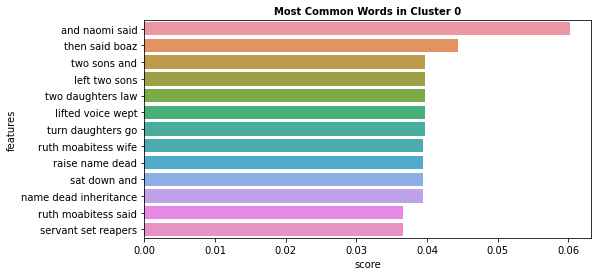

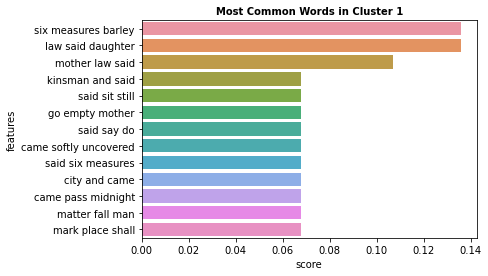

In [51]:
best_result = 2
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [52]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

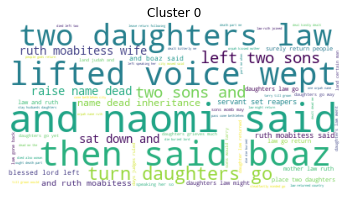

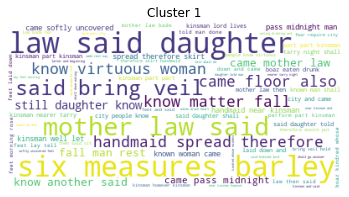

In [53]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [54]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Rute_1,"'came', 'pass', 'days', 'judges', 'ruled', ','...",0
101,Rute_2,"'naomi', 'kinsman', 'husband', ', ',', 'mighty...",0
102,Rute_3,"'naomi', 'mother', 'law', 'said', ',', 'daught...",1
103,Rute_4,"'went', 'boaz', 'gate', ',', 'sat', ':', ',', ...",0


In [55]:
print(df)

      Autor                                              Livro  label
100  Rute_1  'came', 'pass', 'days', 'judges', 'ruled', ','...      0
101  Rute_2  'naomi', 'kinsman', 'husband', ', ',', 'mighty...      0
102  Rute_3  'naomi', 'mother', 'law', 'said', ',', 'daught...      1
103  Rute_4  'went', 'boaz', 'gate', ',', 'sat', ':', ',', ...      0
